<span style="background-color:#f6f8fa">last updated : 2022-Dec-13 / Daegun Kim (daegunkim0425@gmail.com)</span>

# EDA_CheXpert
- **Dataset URL:** https://stanfordaimi.azurewebsites.net/datasets/8cbd9ed4-2eb9-4565-affc-111cf4f7ebe2
- You may find two different versions; **CheXpert-v1.0** and **CheXpert-v1.0-small**. The only differenec is the image size, so we're going to explore the **-small** version.

> ### Table of contents
> 1. [Explore CSV files](#1)
> 2. [Analyze converting strategies](#2)
> 3. [Explore JPEG files](#3)

In [1]:
import os
import pandas as pd
from glob import glob
import seaborn as sns
from copy import deepcopy
import math
import random

from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

## 1. Explore CSV files

### 1.1 Load CSV files and check

In [2]:
small_dir = "../../../../dataset/chexpert/CheXpert-v1.0-small/"
train_df = pd.read_csv(os.path.join(small_dir, "train.csv"))
valid_df = pd.read_csv(os.path.join(small_dir, "valid.csv"))

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 non-null  object 
 2   Age                         223414 non-null  int64  
 3   Frontal/Lateral             223414 non-null  object 
 4   AP/PA                       191027 non-null  object 
 5   No Finding                  22381 non-null   float64
 6   Enlarged Cardiomediastinum  44839 non-null   float64
 7   Cardiomegaly                46203 non-null   float64
 8   Lung Opacity                117778 non-null  float64
 9   Lung Lesion                 11944 non-null   float64
 10  Edema                       85956 non-null   float64
 11  Consolidation               70622 non-null   float64
 12  Pneumonia                   27608 non-null   float64
 13  Atelectasis   

In [4]:
train_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [5]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Path                        234 non-null    object 
 1   Sex                         234 non-null    object 
 2   Age                         234 non-null    int64  
 3   Frontal/Lateral             234 non-null    object 
 4   AP/PA                       202 non-null    object 
 5   No Finding                  234 non-null    float64
 6   Enlarged Cardiomediastinum  234 non-null    float64
 7   Cardiomegaly                234 non-null    float64
 8   Lung Opacity                234 non-null    float64
 9   Lung Lesion                 234 non-null    float64
 10  Edema                       234 non-null    float64
 11  Consolidation               234 non-null    float64
 12  Pneumonia                   234 non-null    float64
 13  Atelectasis                 234 non

In [6]:
valid_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Key observations
* Train & validation data share the same columns but train set has a far bigger number of data samples (around 955 times)
* 14 Target columns (from no findings to support devices) are same dtype 
* The age is the only column which is (approximately) continuous. The others are categorical 
* **There are lots of null data in train but there is no null in validation at all except AP/PA column**

### 1.2 Check missing values

For data with a lot of missing values like our train set, checking whether there is a distinguished pattern of missing sometimes leads to further exploration

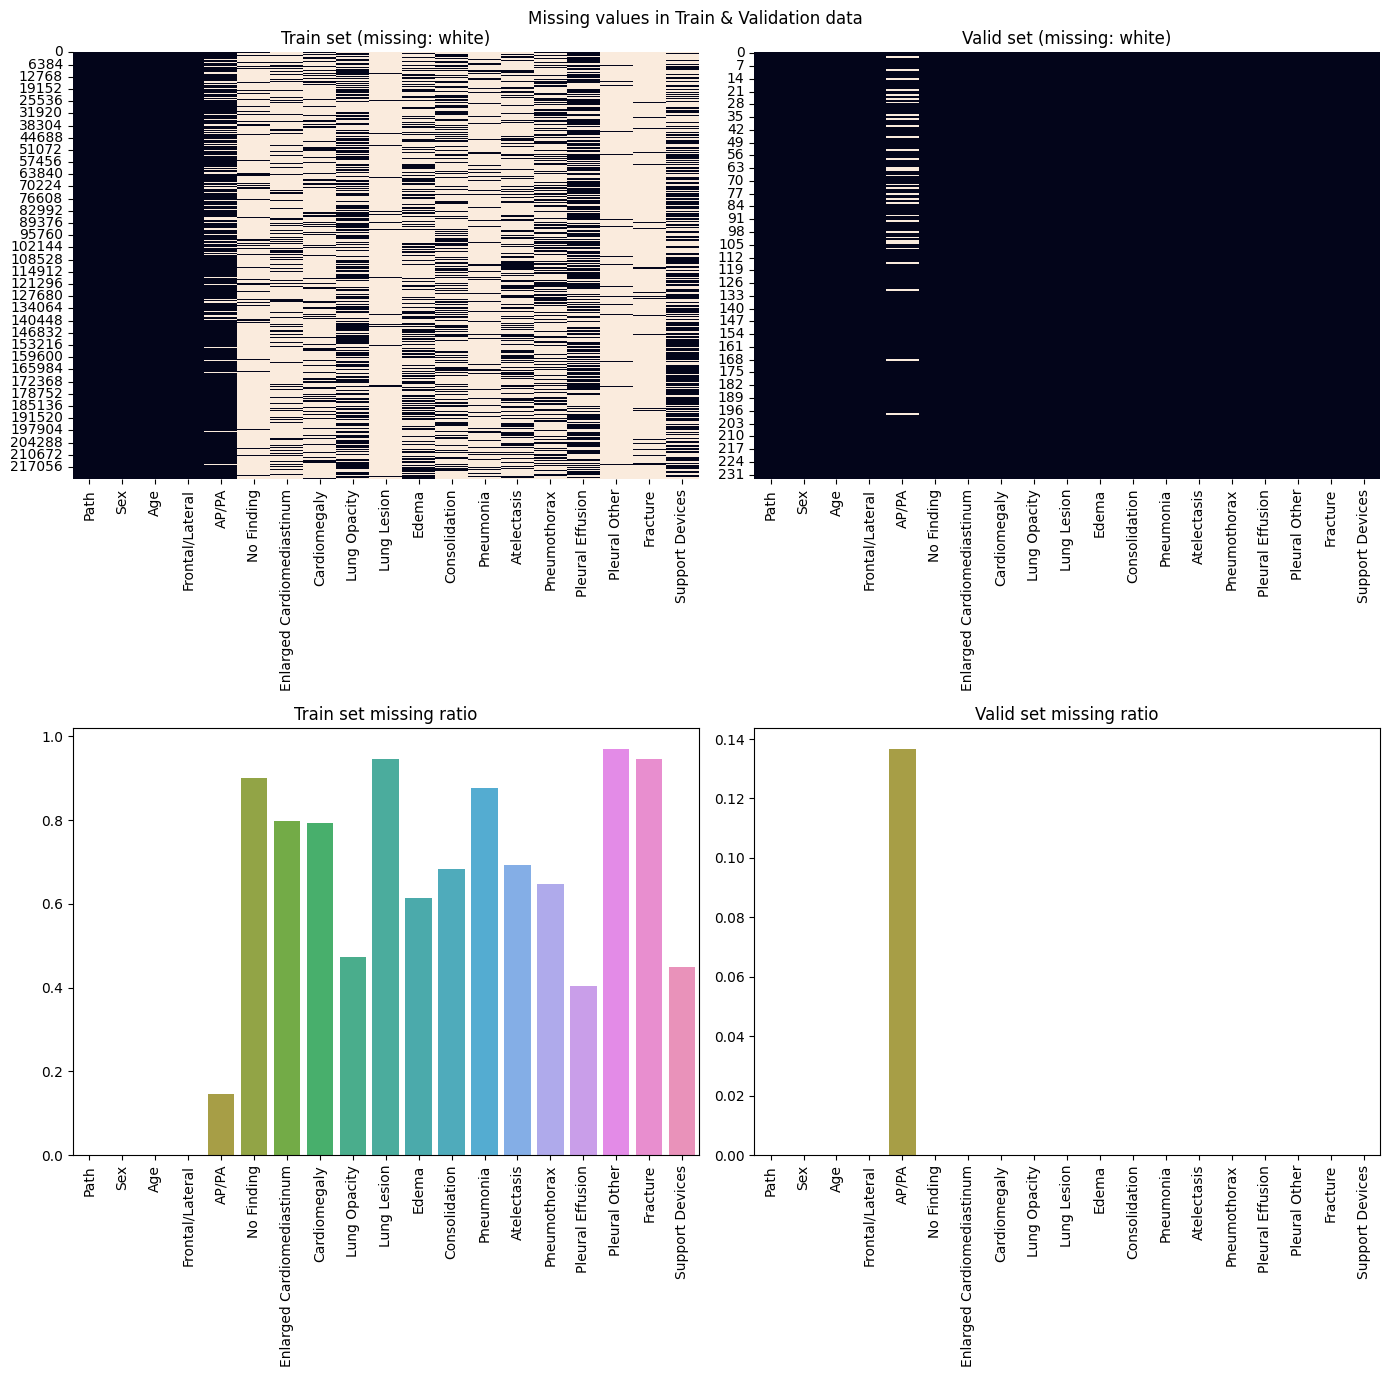

In [7]:
fig_ms_heat, ax_ms_heat = plt.subplots(2, 2, figsize=(14, 14))

sns.heatmap(train_df.isnull(), cbar=False, square=False, ax=ax_ms_heat[0][0])
sns.heatmap(valid_df.isnull(), cbar=False, square=False, ax=ax_ms_heat[0][1])

ax3 = sns.barplot(train_df.isnull(), ax=ax_ms_heat[1][0], errorbar=None)
ax4 = sns.barplot(valid_df.isnull(), ax=ax_ms_heat[1][1], errorbar=None)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax4.set_xticklabels(ax3.get_xticklabels(), rotation=90)

ax_ms_heat[0][0].set_title('Train set (missing: white)')
ax_ms_heat[0][1].set_title('Valid set (missing: white)')
ax_ms_heat[1][0].set_title('Train set missing ratio')
ax_ms_heat[1][1].set_title('Valid set missing ratio')

fig_ms_heat.suptitle('Missing values in Train & Validation data')
fig_ms_heat.tight_layout()

In [8]:
(train_df.isnull().sum()/len(train_df)).sort_values()

Path                          0.000000
Sex                           0.000000
Age                           0.000000
Frontal/Lateral               0.000000
AP/PA                         0.144964
Pleural Effusion              0.403748
Support Devices               0.448481
Lung Opacity                  0.472826
Edema                         0.615261
Pneumothorax                  0.646692
Consolidation                 0.683896
Atelectasis                   0.693649
Cardiomegaly                  0.793196
Enlarged Cardiomediastinum    0.799301
Pneumonia                     0.876427
No Finding                    0.899823
Fracture                      0.945420
Lung Lesion                   0.946539
Pleural Other                 0.970942
dtype: float64

##### Key observations
* It is hard to find distinct patterns of missing value in train dataset
* Only 3 of the 14 target columns (Pleural Effusion, Support Devices, and Lung Opacity) have non-null data more than half
    * Pleural Others, which has the larggest number of null among the train columns, has 97% null data
* The only column which have missing in valid, AP/PA dosen't show any distinct pattern

In [9]:
train_df[['Frontal/Lateral', 'AP/PA']].fillna('MISSING').value_counts().sort_index()

Frontal/Lateral  AP/PA  
Frontal          AP         161590
                 LL             16
                 PA          29420
                 RL              1
Lateral          MISSING     32387
dtype: int64

In [10]:
valid_df[['Frontal/Lateral', 'AP/PA']].fillna('MISSING').value_counts().sort_index()

Frontal/Lateral  AP/PA  
Frontal          AP         169
                 PA          33
Lateral          MISSING     32
dtype: int64

##### Key observations
* According to the combination of Frontal/Lateral and AP/PA columns, we can infer the missing pattern of AP/PA reveals that missing is related to the Lateral in Frontal/Lateral
    * If we suppose the inference above is true, then 16 samples of Frontal-LL and 1 sample of Frontal-RL in train set seem to be mistakes
    * In the context, it could be seen that there is no missing value in the validation dataset

### 1.3 Visualize Target class distribution labels in train and valid dataset

One of the major obstacles in most of classification problems is class imbalance. Thus, it might be useful to check the distribution of each class.

It also helps to check the basic prerequisite of supervised learning, the similarity of distribution between the train and test dataset

In [11]:
target_cols = ['No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

pathology_cols = [v for v in target_cols if v not in ['No Finding', 'Support Devices']]

def calculate_label(df: pd.DataFrame, ratio=False, include_nan=True):
    series_nan = df.isnull().sum()
    series_neg_1 = df[df==-1].count()
    series_0 = df[df==0].count()
    series_1 = df[df==1].count()
    if include_nan:
        new_df = pd.concat([series_nan, series_neg_1, series_0, series_1], axis=1)
        new_df.columns=['Nan', '-1', '0', '1']
    else:
        new_df = pd.concat([series_neg_1, series_0, series_1], axis=1)
        new_df.columns=['-1', '0', '1']

    if ratio:
        new_df /= len(df)

    # drop if no value in column
    new_df.drop(columns=new_df.columns[new_df.sum()==0], inplace=True)

    return new_df

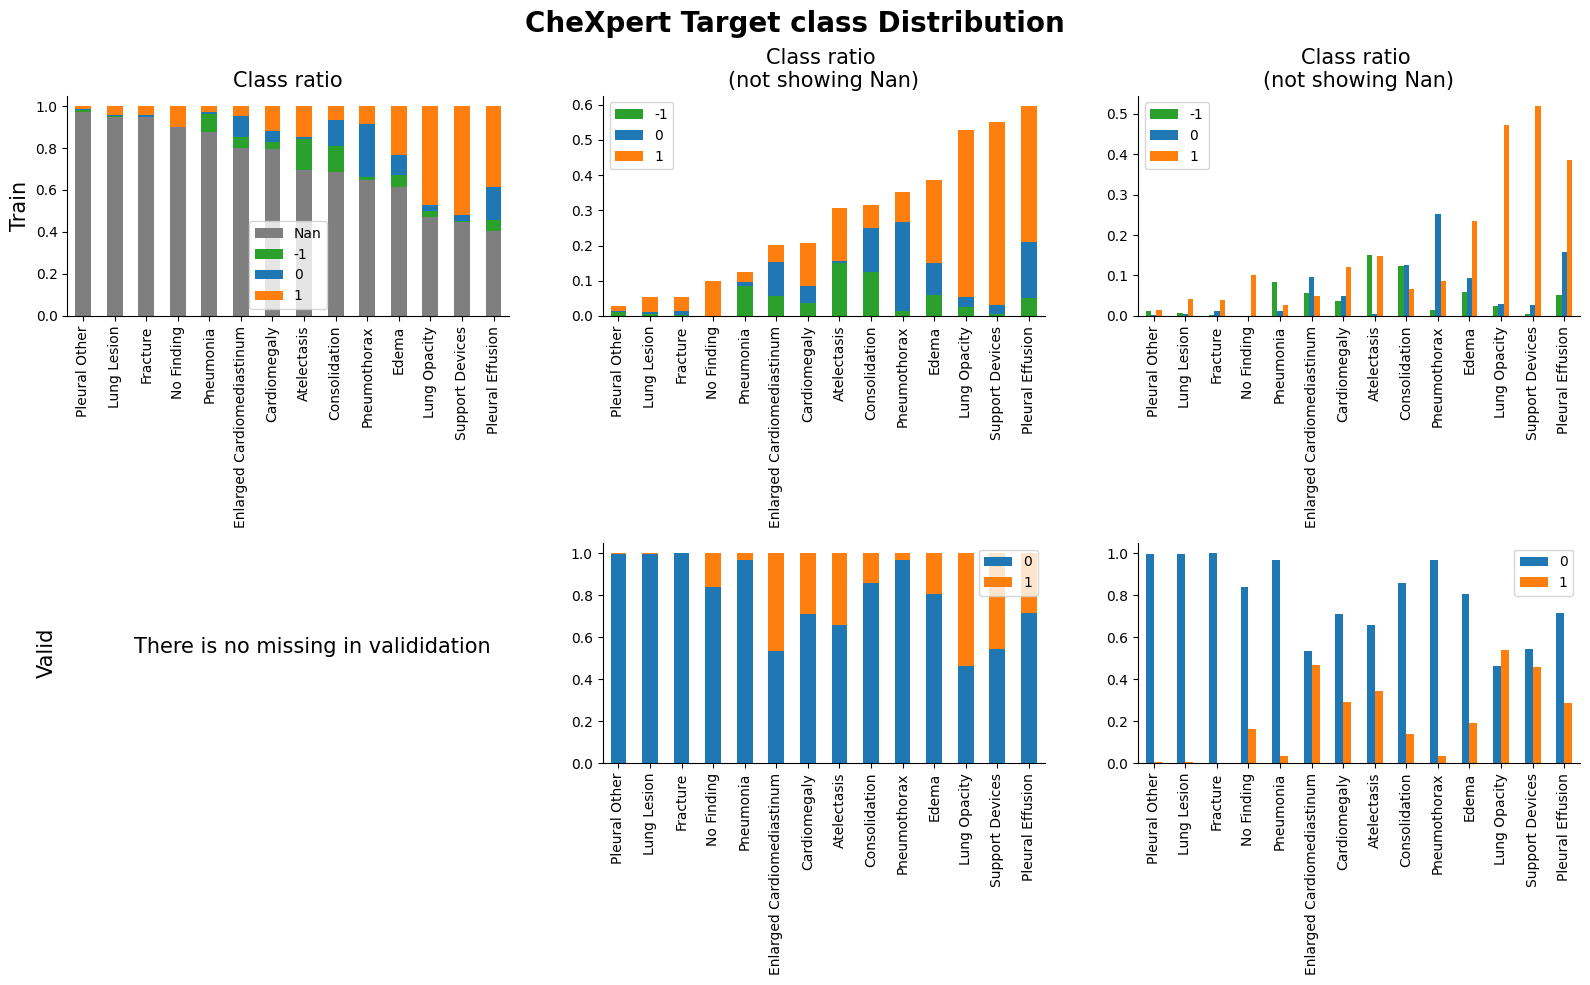

In [12]:
fig_lb_viz, ax_lb_viz = plt.subplots(2, 3, figsize=(16, 10))

calculate_label(train_df[target_cols], ratio=True, include_nan=True).sort_values('Nan', ascending=False).plot(
    kind='bar', stacked=True, ax=ax_lb_viz[0][0], color=['tab:gray','tab:green','tab:blue','tab:orange'])
order_by_nan_ratio = calculate_label(train_df[target_cols], ratio=True, include_nan=True).sort_values('Nan', ascending=False).index
calculate_label(train_df[target_cols], ratio=True, include_nan=False).loc[order_by_nan_ratio, :].plot(
    kind='bar', stacked=True, ax=ax_lb_viz[0][1], color=['tab:green','tab:blue','tab:orange'])
calculate_label(train_df[target_cols], ratio=True, include_nan=False).loc[order_by_nan_ratio, :].plot(
    kind='bar', stacked=False, ax=ax_lb_viz[0][2], color=['tab:green','tab:blue','tab:orange'])

ax_lb_viz[1][0].text(x=0.15, y=0.5, s='There is no missing in valididation', fontsize=15)
calculate_label(valid_df[target_cols], ratio=True, include_nan=False).loc[order_by_nan_ratio, :].plot(kind='bar', stacked=True, ax=ax_lb_viz[1][1])
calculate_label(valid_df[target_cols], ratio=True, include_nan=False).loc[order_by_nan_ratio, :].plot(kind='bar', stacked=False, ax=ax_lb_viz[1][2])

ax_lb_viz[0][0].set_ylabel('Train', fontsize=15)
ax_lb_viz[1][0].set_ylabel('Valid', fontsize=15)

ax_lb_viz[0][0].set_title('Class ratio', fontsize=15)
ax_lb_viz[0][1].set_title('Class ratio \n(not showing Nan)', fontsize=15)
ax_lb_viz[0][2].set_title('Class ratio \n(not showing Nan)', fontsize=15)

for i in ax_lb_viz:
    for ax in i:
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
ax_lb_viz[1][0].spines.bottom.set_visible(False)
ax_lb_viz[1][0].spines.left.set_visible(False)
ax_lb_viz[1][0].set_xticks([])
ax_lb_viz[1][0].set_yticks([])

fig_lb_viz.suptitle('CheXpert Target class Distribution', fontsize=20, fontweight='bold')
fig_lb_viz.tight_layout()

##### Key observations
* Expect for nan and uncertain (-1) in train, many target columns in train dataset have more class 1 (Exist) than class 0 (Not Exist). However, in valid dataset, it is the opposite. Thus, we could infer that converting nan & uncertain class (-1) is the key to the distribution similarity between train and valid set
* Both of train and valid set, most of target columns are imbalanced
    * Fortunately, train set has many target columns with more positive class (1) than negative class (0). In terms of pathology diagnosis, positive class is more valuable than negative class

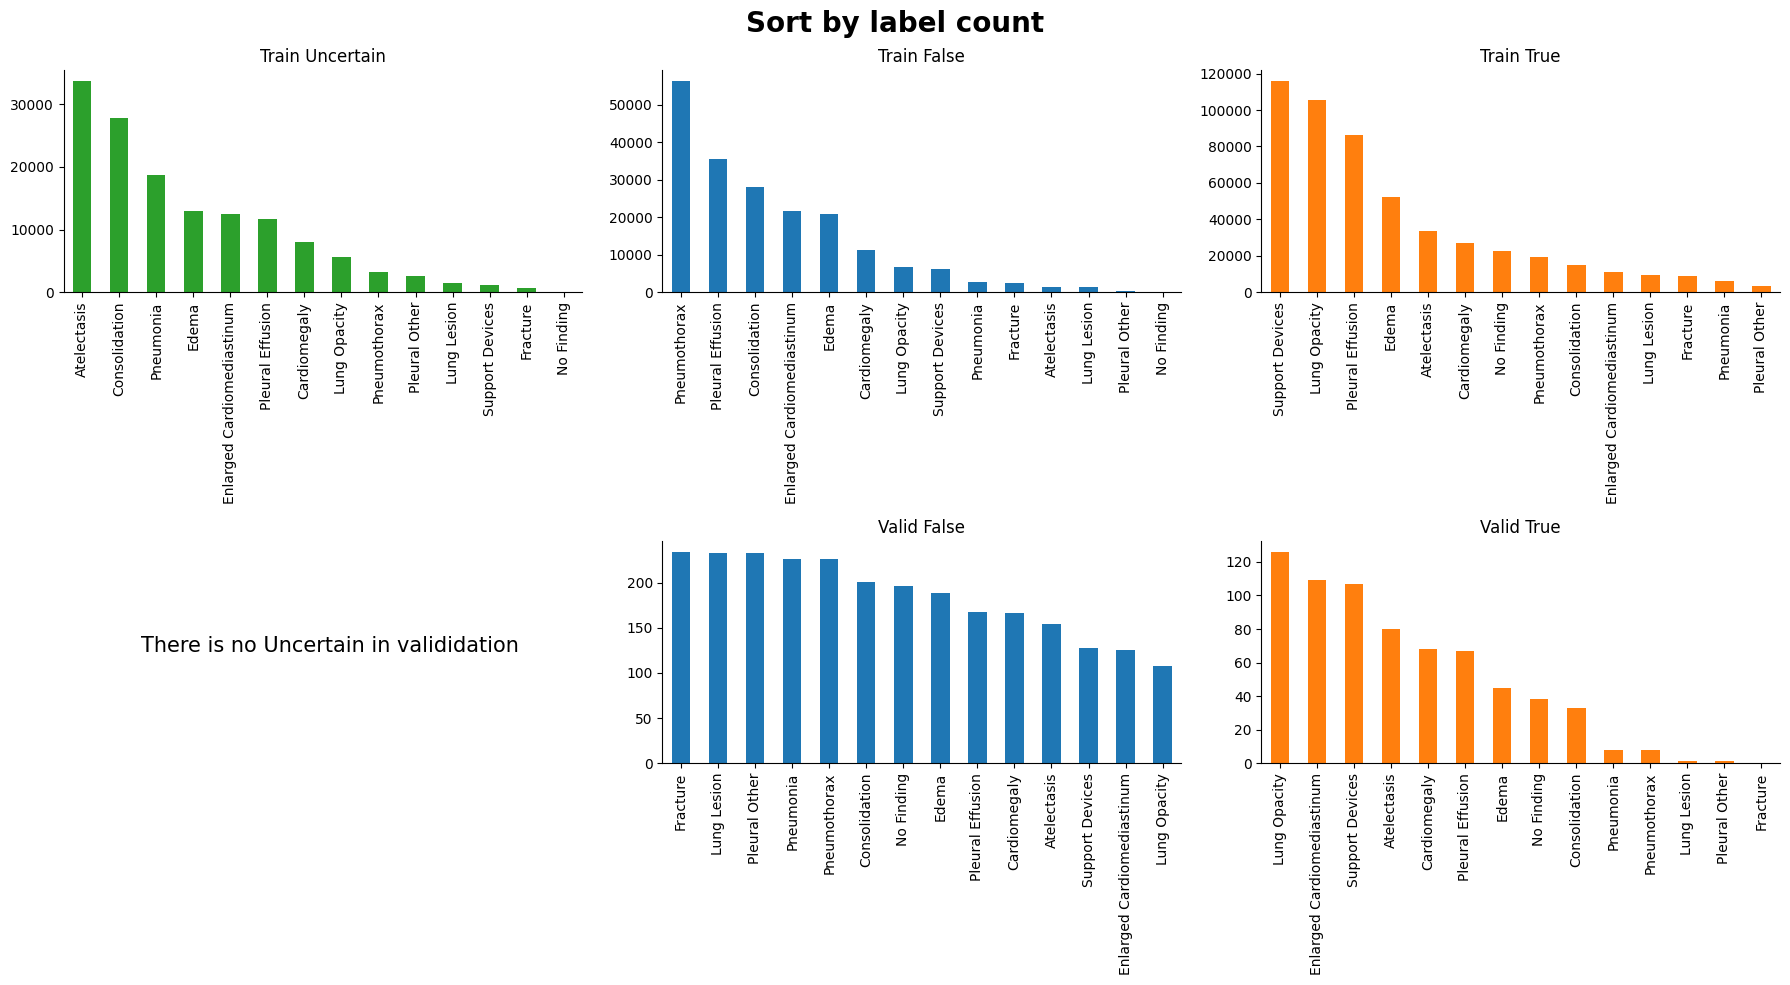

In [13]:
fig_val_sort, ax_val_sort = plt.subplots(2, 3, figsize=(18, 10))

calculate_label(train_df[target_cols], ratio=False, include_nan=False)['-1'].sort_values(ascending=False).plot(
    kind='bar', ax=ax_val_sort[0][0], title='Train Uncertain', color='tab:green')
calculate_label(train_df[target_cols], ratio=False, include_nan=False)['0'].sort_values(ascending=False).plot(
    kind='bar', ax=ax_val_sort[0][1], color='tab:blue', title='Train False')
calculate_label(train_df[target_cols], ratio=False, include_nan=False)['1'].sort_values(ascending=False).plot(
    kind='bar', ax=ax_val_sort[0][2], color='tab:orange', title='Train True')

ax_val_sort[1][0].text(x=0.15, y=0.5, s='There is no Uncertain in valididation', fontsize=15)
calculate_label(valid_df[target_cols], ratio=False, include_nan=False)['0'].sort_values(ascending=False).plot(
    kind='bar', ax=ax_val_sort[1][1], color='tab:blue', title='Valid False')
calculate_label(valid_df[target_cols], ratio=False, include_nan=False)['1'].sort_values(ascending=False).plot(
    kind='bar', ax=ax_val_sort[1][2], color='tab:orange', title='Valid True')

for i in ax_val_sort:
    for ax in i:
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
ax_val_sort[1][0].spines.bottom.set_visible(False)
ax_val_sort[1][0].spines.left.set_visible(False)
ax_val_sort[1][0].set_xticks([])
ax_val_sort[1][0].set_yticks([])

fig_val_sort.suptitle('Sort by label count', fontsize=20, fontweight='bold')
fig_val_sort.tight_layout()

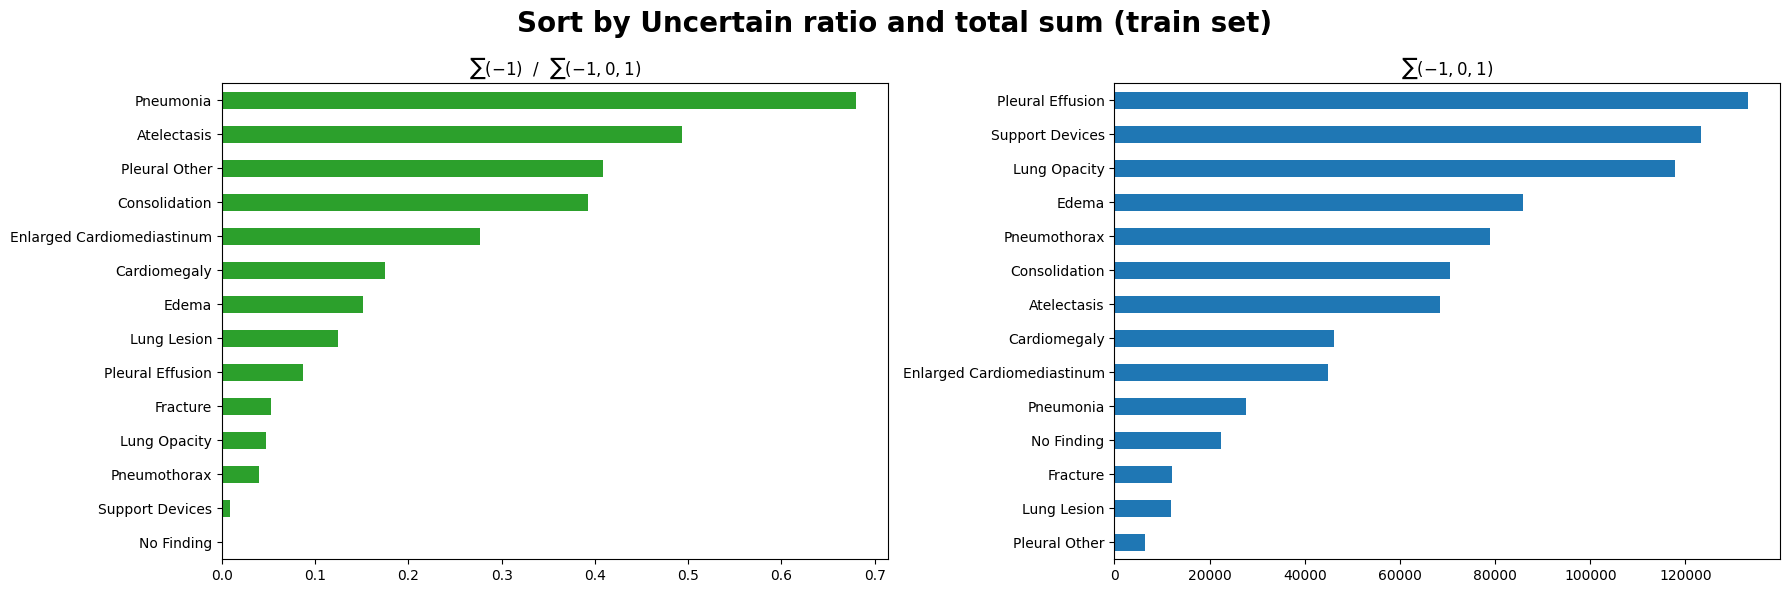

In [14]:
fig_uncertain_ratio, ax_uncertain_ratio = plt.subplots(1, 2, figsize=(18, 6))

train_lb_cnt_df = calculate_label(train_df[target_cols], ratio=False, include_nan=False)
train_lb_cnt_df['total'] = train_lb_cnt_df.sum(axis=1)
train_lb_cnt_df.total.sort_values().plot(kind='barh', ax=ax_uncertain_ratio[1], title=r'$\sum(-1, 0, 1)$')

train_uncertain_portion = train_lb_cnt_df['-1']/train_lb_cnt_df['total']
train_uncertain_portion.sort_values().plot(kind='barh', ax=ax_uncertain_ratio[0], title=r'$\sum(-1)$  /  $\sum(-1, 0, 1)$', color='tab:green')

fig_uncertain_ratio.suptitle('Sort by Uncertain ratio and total sum (train set)', fontsize=20, fontweight='bold')
fig_uncertain_ratio.tight_layout()

##### Key observations
* Some columns of train dataset are overwhelmed by the uncertain class. For example, Pneumonia has around 70% of the summation of classes (-1, 0, 1) are uncertain
    * Conversely, even if the non-pathological targets such as No Finding and Support Devices are excluded, some pathological targets have a few uncertain class. It means that the importance of converting uncertain class depends on the user choice of the target column

### 1.4 Check exclusivity between 'No Finding' and pathological targets

Positive class of No Finding column means there is no disease. Then, we need to check that is true (whether there is miswritten data or not) and relation with the missing values

In [15]:
def label_mapping(x):
    if x == -1:
        return 'Uncertain'
    elif x==0:
        return False
    elif x==1:
        return True
    elif math.isnan(x):
        return 'MISSING'
    else:
        raise ValueError(f'{x} is not expected')

train_lb_cvtd_df = deepcopy(train_df[target_cols])
train_lb_cvtd_df = train_lb_cvtd_df.applymap(label_mapping)

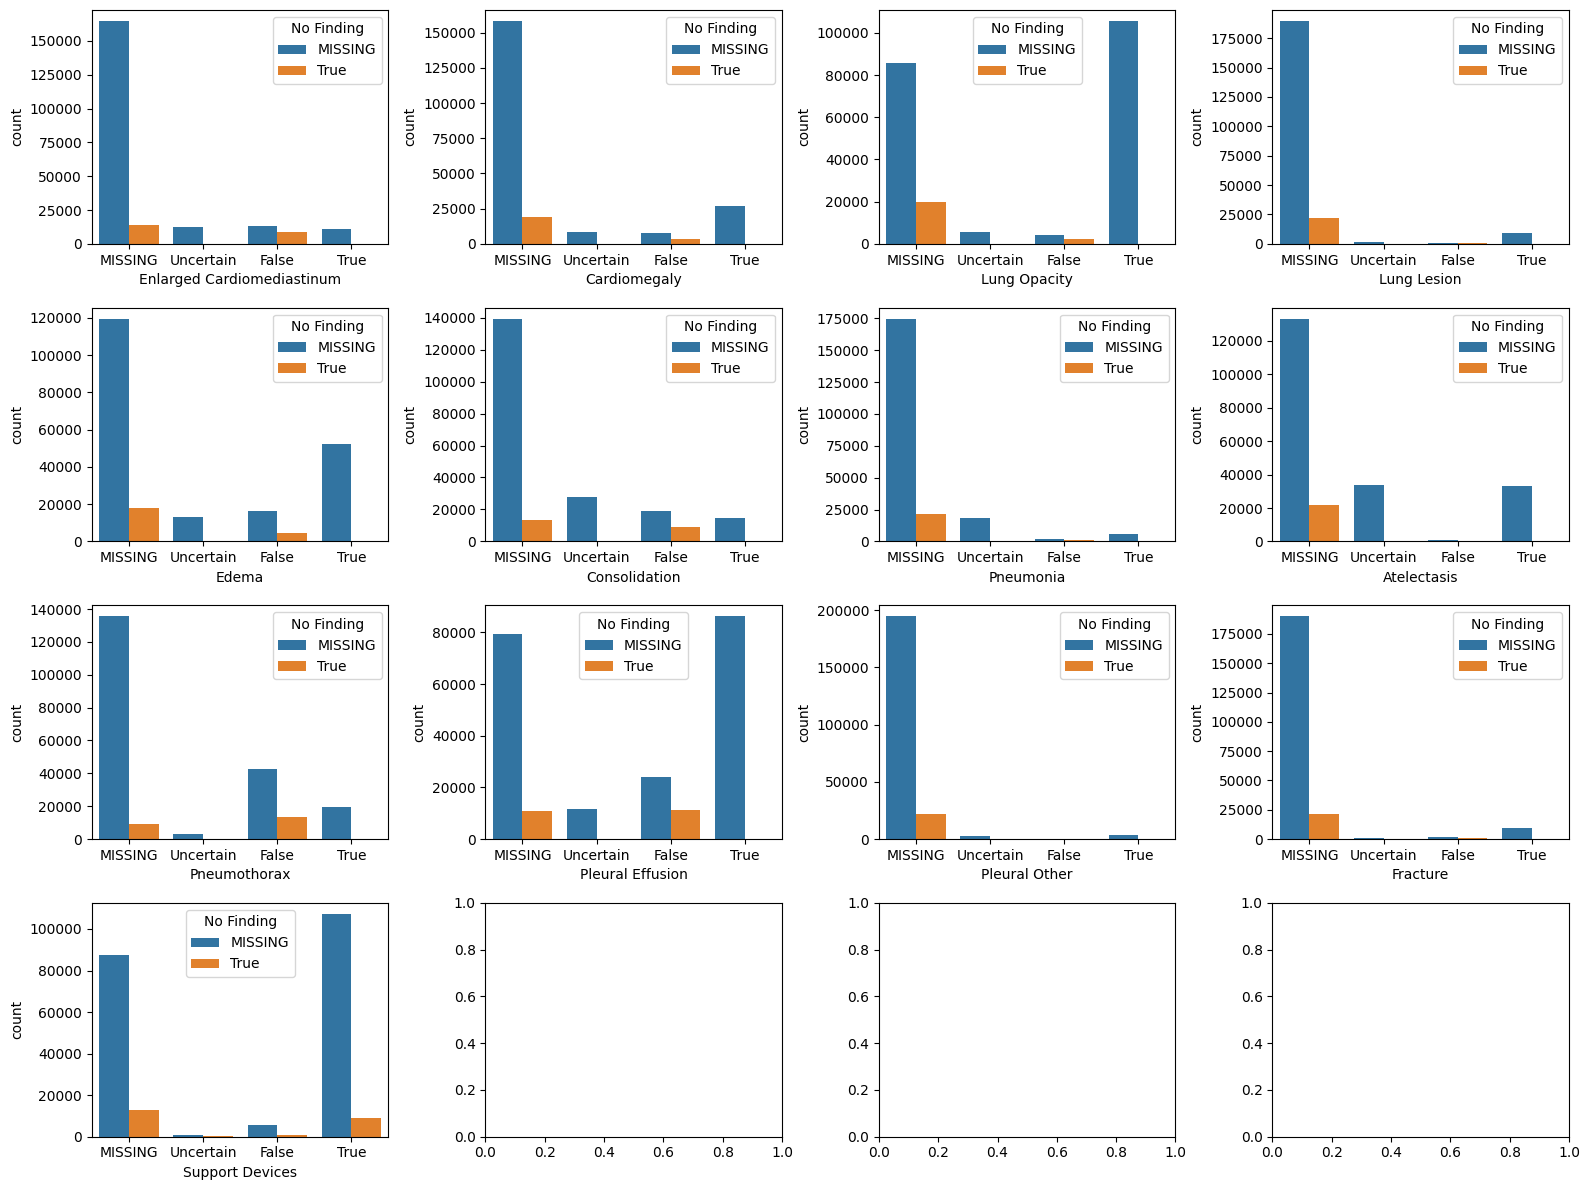

In [16]:
def plot_multi_crosstab(df, keys:list, hue:str, order:list, hue_order:list):
    num_subplots = int(np.ceil(np.sqrt(len(keys))))
    fig, ax = plt.subplots(num_subplots, num_subplots, figsize=(4*num_subplots, 3*num_subplots))

    ax = ax.flatten()
    for i, key in enumerate(keys):
       sns.countplot(train_lb_cvtd_df, x=key, hue=hue, ax=ax[i], order=order, hue_order=hue_order)

    fig.tight_layout()

plot_multi_crosstab(train_lb_cvtd_df, [col for col in target_cols if col != 'No Finding'], 'No Finding', ['MISSING','Uncertain', False, True], ['MISSING', True])

##### Key observations
* The exclusivity of No Finding is true. It in line with support divices (non pathological target) as true class when No Finding is true
* In the context of No Finding labeling, converting pathological columns from null to positive might be controversial

### 1.5 Target balance in terms of view point 

Among three of non-target columns (Sex, Age, and Frontal/Lateral. The AP/PA could be treated as subcategory of Frontal/Lateral) except for the Path, Frontal/Lateral is special

Since Frontal/Lateral information is included in the image itself, the model can access the Frontal/Lateral information without explict tabular shaped Frontal/Lateral data. Thus, Frontal/Lateral is qualitatively different from Age or Sex

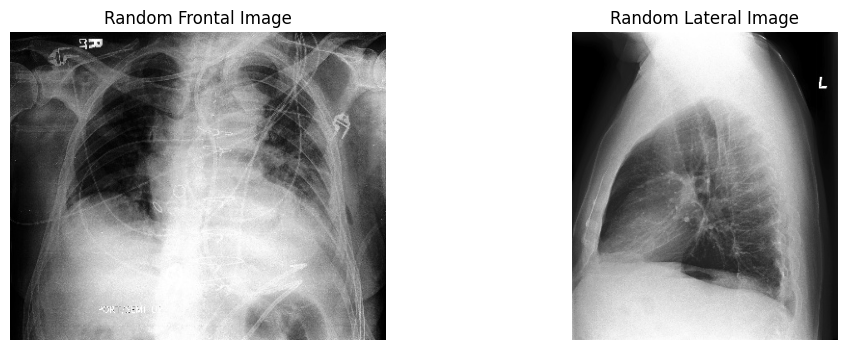

In [17]:
def plot_two_image(path1, path2, title1=None, title2=None):
    plt.figure(figsize=(12, 4))

    img1 = Image.open(path1)
    img2 = Image.open(path2)

    ax1 = plt.subplot((121))
    plt.imshow(img1, cmap='gray')
    plt.title(title1)
    plt.axis(False)

    ax2 = plt.subplot((122))
    plt.imshow(img2, cmap='gray')
    plt.title(title2)
    plt.axis(False)

plot_two_image(
    '../../../../dataset/chexpert/' + train_df[train_df['Frontal/Lateral']=='Frontal'].Path.sample(random_state=42).values[0],
    '../../../../dataset/chexpert/' + train_df[train_df['Frontal/Lateral']=='Lateral'].Path.sample(random_state=42).values[0],
    'Random Frontal Image',
    'Random Lateral Image',
    )

#### 1.5.1 Relation between view point and other patient informations

<AxesSubplot: xlabel='count', ylabel='Frontal/Lateral'>

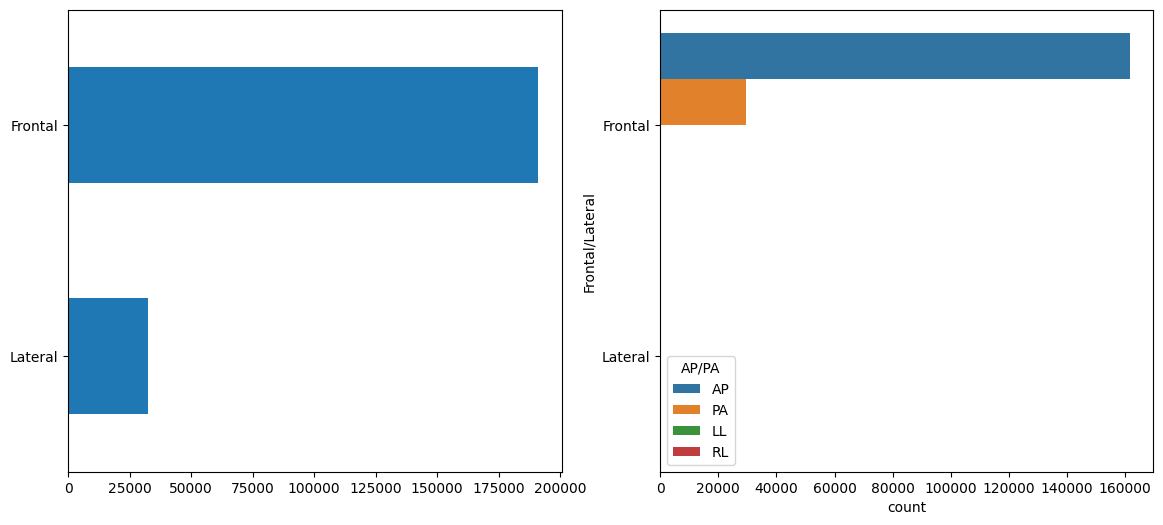

In [18]:
fig_view_smp, ax_view_smp = plt.subplots(1, 2, figsize=(14, 6))

train_df['Frontal/Lateral'].value_counts(ascending=True).plot(kind='barh', ax=ax_view_smp[0])
sns.countplot(train_df, y='Frontal/Lateral', hue='AP/PA', ax=ax_view_smp[1])

##### Key observations
* There are far more Frontal than Lateral
    * There are far more AP than PA among Frontal
* Frontal view has subcategory but Lateral has no subcategory

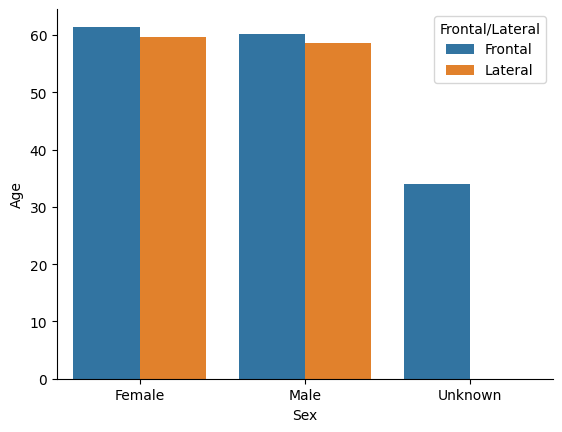

In [19]:
f = sns.barplot(train_df, x='Sex', y='Age', hue='Frontal/Lateral', errorbar=None)
f.spines.top.set_visible(False)
f.spines.right.set_visible(False)

##### Key observation
* Age is balanced in terms of Sex and View point (Note that there is only one sample with unknown sex)

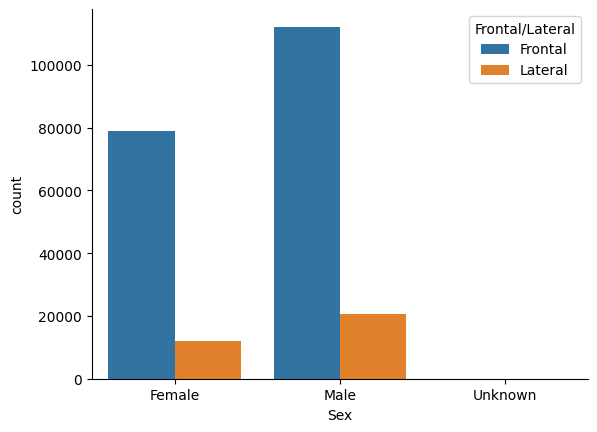

In [20]:
f = sns.countplot(train_df, hue='Frontal/Lateral', x='Sex')
f.spines.top.set_visible(False)
f.spines.right.set_visible(False)

##### Key observation
* View point is balanced in terms of Sex

Given the relationship between Frontal/Lateral with Sex and Age. There is no clear evidence of implicit feeding of Sex and Age information to the model by image itself

Thus, ignoring Sex and Age may not make a serious problem when we feed image data without tabular data to the model 

#### 1.5.2 Relataion between Frontal/Lateral and target class distribution

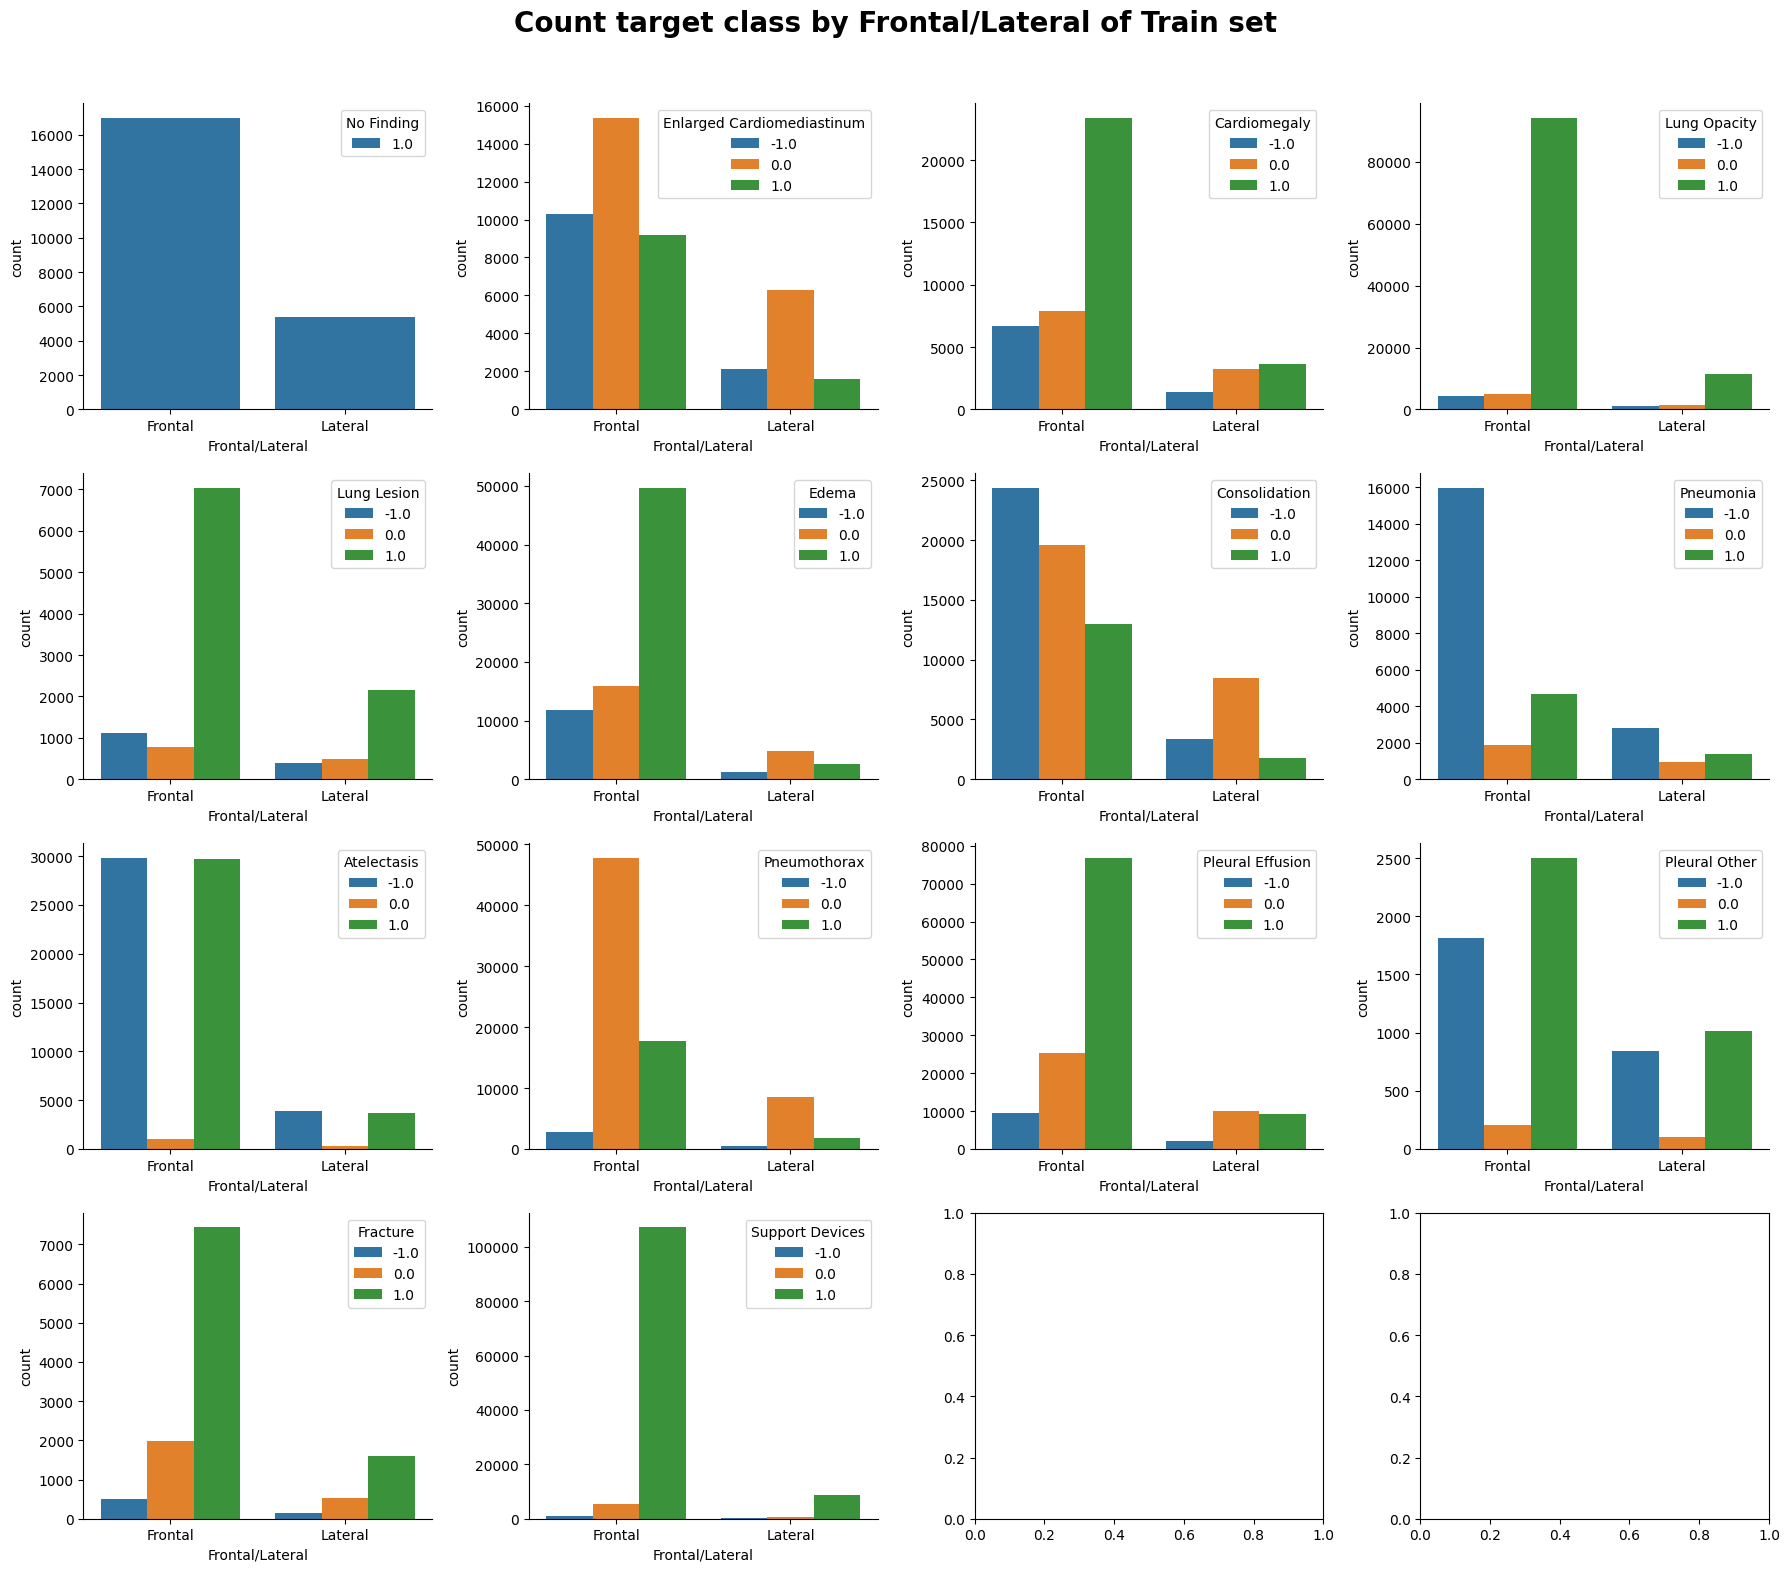

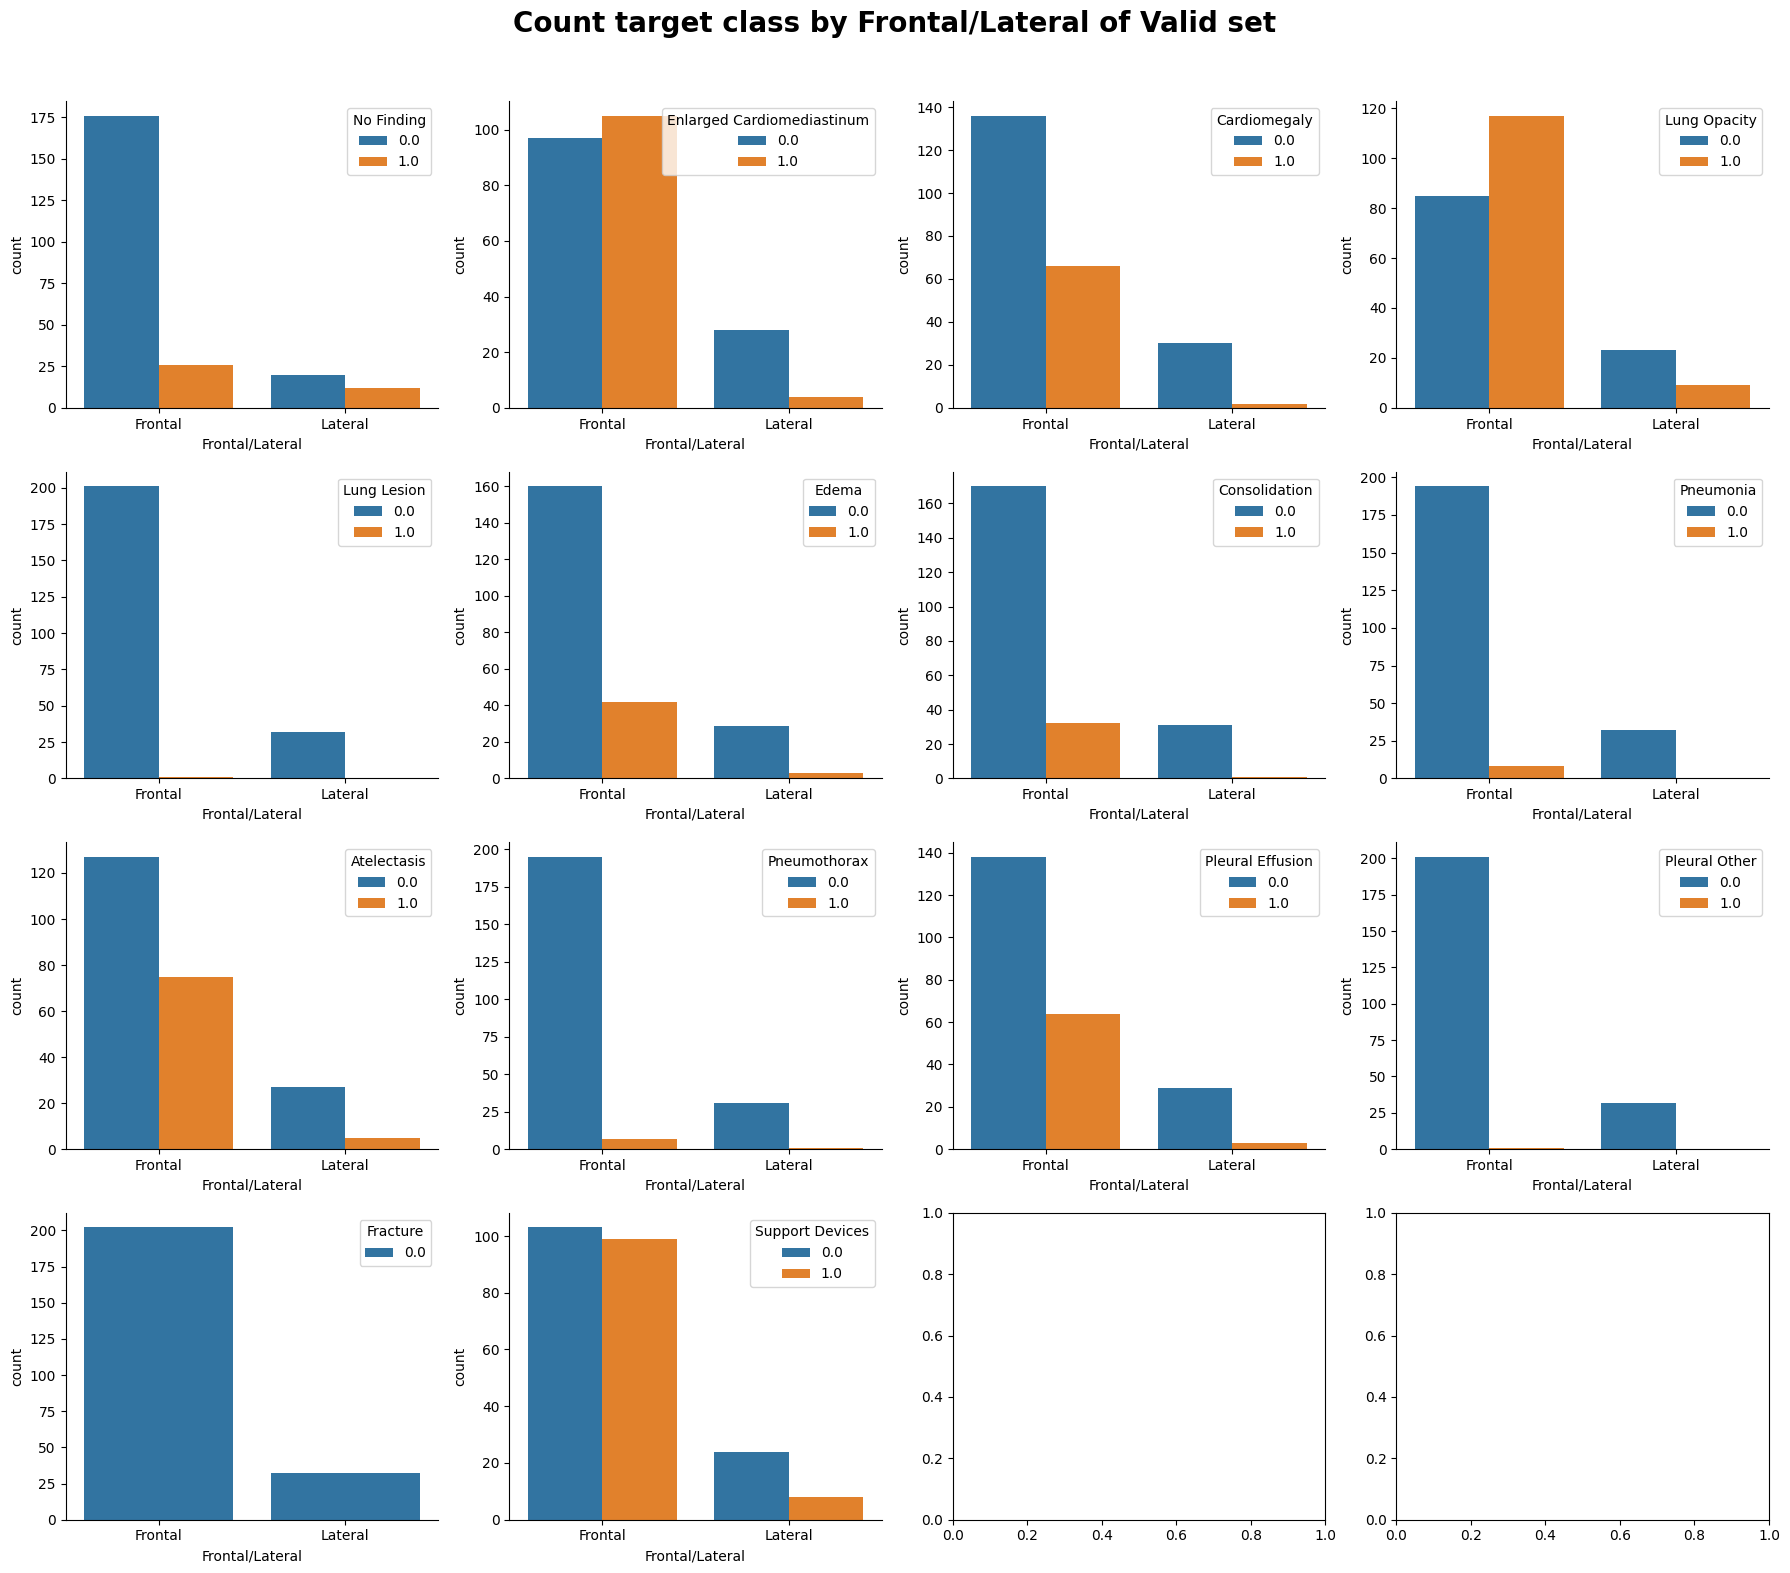

In [21]:
def plot_relatiion_view_target(df, title=None):
    fig_rel_view_tgt, ax_rel_view_tgt = plt.subplots(4, 4, figsize=(18, 16))

    ax_rel_view_tgt = ax_rel_view_tgt.flatten()

    for idx, col in enumerate(target_cols):
        sns.countplot(df, x='Frontal/Lateral', hue=col, ax=ax_rel_view_tgt[idx])
        ax_rel_view_tgt[idx].spines.top.set_visible(False)
        ax_rel_view_tgt[idx].spines.right.set_visible(False)

    fig_rel_view_tgt.suptitle(title, fontsize=20, fontweight='bold')
    fig_rel_view_tgt.tight_layout()

plot_relatiion_view_target(train_df, 'Count target class by Frontal/Lateral of Train set\n\n')
plot_relatiion_view_target(valid_df, 'Count target class by Frontal/Lateral of Valid set\n\n')

##### Key observations
In train set
* Most of target columns show balanced distribution of target classes in terms of view point
    * For example, for fractures in the bottom left of train set upper figure, there are many fracture samples with the frontal view in order of classes 1, 0, and -1. Also, lateral view share this kind of property (1)
    * Different class distributions are shown for frontal and lateral views in **Lung Lesion, Edema, Consolidation, and Pleural Effusion** (2)
    
In valid set
* Different class distributions are shown for frontal and lateral views in **Enlarged Cardiomediastinum, Lung Opacity** in terms of the perspective mentioned above (1) and (2)
* For **No Finding, Cardiomegaly, Edema, Consolidation, Pneumonia, Atelectasis, Pleural Effision, and Support Device**, there are differences in the amount of positive and negative labels between frontal view and lateral view

In conclusion,
* If we give the model both frontal and lateral images, Frontal/Lateral information might affect a model's pathological diagnosis process, especially for some of target columns
* It is true that there are many more frontal view images than lateral view, and it gives frontal view images the power to drive the distribution of target classes. Thus, it might be quite a different problem to handle Lateral only and the others